<a href="https://colab.research.google.com/github/BautistaDavid/Team-1-Machine-Learning/blob/main/Proyecto_3_PLN_noticias_mundo_clarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombres:** 
* David Felipe Bautista Bernal
* Angie Milena Prieto Velasquez 
* Santiago Villalobos Barrera

# **Web Scraping y PLN noticias mundo periodico Clarín** 

## **Scrapeando al Clarín**
* En un primer momento se reliza un codigo para realizar Web Scraping sobre las Noticias recientes de la seccion "Mundo" del periodico argenitno Clarín, se usan los modulos ```BeautifulSoup ``` y ```requests ```

In [24]:
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
revista="https://www.clarin.com/mundo/"
pag_revista=rq.get(revista)
pag_revista_sopa=BeautifulSoup(pag_revista.text,"lxml")   #Se crea la sopa para la seccion de noticias mundo del periodico

* Se accede a los links de las pirncipales noticias presentes en el portal del periodico y se crea un lista con estos.

In [25]:
sopa_lista_noticias=pag_revista_sopa.find_all("article",attrs={"class":"content-nota onexone_foto list"})
lista_links_noticias=[]

for i in range(len(sopa_lista_noticias)):
  lista_links_noticias.append("https://www.clarin.com"+sopa_lista_noticias[i].a.get("href"))

In [26]:
lista_links_noticias

['https://www.clarin.com/sociedad/derrumbe-miami-identificaron-cuerpo-fabian-nunez-pareja-cirujano-plastico-argentino-andres-galfrascoli_0_4eFh1ZzzU.html',
 'https://www.clarin.com/mundo/-justicia-espanola-define-asesinato-samuel-chico-gay-muerto-golpes-crimen-homofobico-_0_vWNFdG6fg.html',
 'https://www.clarin.com/mundo/-vuelve-surgir-exodo-silencioso-balsero-penurias-represion-cuba-_0_amJEjvrNa.html',
 'https://www.clarin.com/mundo/crisis-venezuela-esposa-juan-guaido-denuncia-policia-chavista-llego-casa-detenerlo_0_XetSjhS9V.html',
 'https://www.clarin.com/mundo/derrumbe-miami-sobrevivio-bahia-cochinos-murio-edificio-colapsado-florida_0_QdMSon6Zp.html',
 'https://www.clarin.com/mundo/crisis-venezuela-agentes-chavismo-arrestaron-diputado-opositor-freddy-guevara_0_HbZeazlns5.html',
 'https://www.clarin.com/mundo/joe-biden-dijo-protestas-cuba-llamado-libertad-pidio-regimen-escuche-pueblo-_0_sOA-j-YnD.html',
 'https://www.clarin.com/mundo/presidente-cuba-miguel-diaz-canel-acuso-unidos-qu

* Se crea ahora un diccionario para almacenar la informacion de Titulo, Subtitulo y texto de las noticias.

  Por medio de un bucle se scrapeara la infromación objetivo, el bucle itera    sonre la lista de links de las noticiasm, de manera que accede a este, crea una sopa con el contenido del mismo para posteriormente identidicar las etiquetas y el texto que sirve de cada una de estas  

In [27]:
datos={"Titulo":[],
       "Fecha":[],
       "subtitulo":[],
       "Texto":[]}
       
for link_noticia in lista_links_noticias:
  noticia=rq.get(link_noticia)
  sopa_noticia=BeautifulSoup(noticia.text,"lxml")
  datos["Titulo"].append(sopa_noticia.find("div",attrs={"class":"title"}).find("h1").text)
  datos["Fecha"].append(sopa_noticia.find("span",attrs={"class":"publishedDate"}).text)
  datos["subtitulo"].append(sopa_noticia.find("div",attrs={"class":"bajada"}).find("h2").text) 
  texto=[]
  for renglon in (sopa_noticia.find("div",attrs={"class":"body-nota"}).find_all("p")):
    texto.append(renglon.text)  
  texto_noticia=" ".join(texto)
  datos["Texto"].append(texto_noticia) 

* Ahora se convierte a DataFrame el diccionario con los datos Extraidos del periodico, asi mismo se puede generar un formato csv para dicha información.


In [28]:
datos_noticias=pd.DataFrame(datos)
datos_noticias.to_csv("datos_noticias.csv")
datos_noticias.head()

,Titulo,Fecha,subtitulo,Texto
0,Derrumbe en Miami: identificaron el cuerpo de ...,\n12/07/2021 17:30\n,Lo confirmó este lunes la policía. Según alleg...,La policía de Miami-Dade informó este lunes qu...
1,¿Por qué la justicia española no define el ase...,\n12/07/2021 17:00\n,A casi diez días del asesinato a golpes del jo...,A casi diez días del asesinato a golpes de Sam...
2,Protestas en Cuba: ¿vuelve a surgir el “éxodo ...,\n12/07/2021 16:00\n,El aumento en lo que va de año del número inmi...,El aumento en lo que va de año del número de b...
3,Crisis en Venezuela: la esposa de Juan Guaidó ...,\n12/07/2021 15:02\n,"“Funcionarios de las FAES están en mi casa, in...",Funcionarios del grupo élite (FAES) de la Poli...
4,Derrumbe en Miami: sobrevivió a Bahía de Cochi...,\n12/07/2021 15:00\n,Juan Mora fue capturado y encerrado durante me...,Sesenta años antes de que el edificio de depar...


# **PLN noticias extraidas** 


* Se va  procesar el texto de las noticias extraidas. Por lo cual en un primer momento se va limpiar dicha infromacion por medio de la eliminacion de caracteres anormales y se un proceso de lowering 

## **Lowering y Caracteres Anormales**

In [ ]:
!pip install nltk
!pip install contexto

In [33]:
import nltk
from contexto.limpieza import limpieza_texto,lista_stopwords,lista_nombres
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download("punkt") 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* Se genera  una lista don los diferentes textos limpios (minusculas y sin caracteres anormales). Se eliminar determinadas stopwords tanto predeterminadas como unas especificadas.


In [34]:
lista_stopwords_=lista_stopwords()
stop_words_adicionales=["enviar","comentar","notas","clic","datos","comentar","nuestras","notas","completá","siguientes","datos",
                        "clarin","exclusivo","suscriptores","suscribite","suscripcion","debes","activar","cuenta","haciendo","mail",
                        "enviamos","casilla","encontraste","mail","hace","volvemos","favor"]
lista_stopwords_=lista_stopwords_+stop_words_adicionales
textos_limpios=[]
for cuerpo_noticia in datos_noticias["Texto"]:
  texto_limpio=limpieza_texto(cuerpo_noticia,lista_palabras=lista_stopwords_,n_min=4,quitar_acentos=True) 
  textos_limpios.append(texto_limpio)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
textos_limpios[0]

'policia miami dade informo lunes hallo cuerpo fabian nunez marido cirujano plastico andres galfrascoli desaparecidos tras derrumbe champlain towers surfside junto hija sofia allegados familia contaron semana comunicado aparicion cuerpos galfrascoli sofia viernes hallado cuerpo abogada argentina anos nicole nicky langesfeld escombros edificio derrumbado surfside junio update have identified nine additional victims that sadly unexpectedly lost their lives tragic surfside building collapse please keep their families loved ones your prayers twitter mvwxiy nueve argentinos desaparecidos rescatados cuerpos fotografa graciela cattarossi hija stella padres gino graciela madre uruguaya hermana andrea tambien ilan naibryf estudiante fisica anos andres galfrascoli cirujano plastico desaparecio derrumbe junto pareja fabian nunez sofia anos hija mudado complejo ubicado metros miami beach avenida collins vivian departamento mudado edificio colapso tenian pasajes volver argentina semana siguiente de

## **Tokenización y Stemming**

In [36]:
textos_tokenizado=[]
for texto_limpio in textos_limpios:
  tokenizado=word_tokenize(texto_limpio)
  textos_tokenizado.append(tokenizado)
  

In [37]:
stemmer=SnowballStemmer("spanish")
textos_stemming=[]
for listas_tokenizadas in textos_tokenizado:
  lista=[]
  for palabra in listas_tokenizadas:
    lista.append(stemmer.stem(palabra))  
  textos_stemming.append(lista)

* Ahora podemos observar los textos tokenizados

In [55]:
textos_tokenizado[0]

['policia',
 'miami',
 'dade',
 'informo',
 'lunes',
 'hallo',
 'cuerpo',
 'fabian',
 'nunez',
 'marido',
 'cirujano',
 'plastico',
 'andres',
 'galfrascoli',
 'desaparecidos',
 'tras',
 'derrumbe',
 'champlain',
 'towers',
 'surfside',
 'junto',
 'hija',
 'sofia',
 'allegados',
 'familia',
 'contaron',
 'semana',
 'comunicado',
 'aparicion',
 'cuerpos',
 'galfrascoli',
 'sofia',
 'viernes',
 'hallado',
 'cuerpo',
 'abogada',
 'argentina',
 'anos',
 'nicole',
 'nicky',
 'langesfeld',
 'escombros',
 'edificio',
 'derrumbado',
 'surfside',
 'junio',
 'update',
 'have',
 'identified',
 'nine',
 'additional',
 'victims',
 'that',
 'sadly',
 'unexpectedly',
 'lost',
 'their',
 'lives',
 'tragic',
 'surfside',
 'building',
 'collapse',
 'please',
 'keep',
 'their',
 'families',
 'loved',
 'ones',
 'your',
 'prayers',
 'twitter',
 'mvwxiy',
 'nueve',
 'argentinos',
 'desaparecidos',
 'rescatados',
 'cuerpos',
 'fotografa',
 'graciela',
 'cattarossi',
 'hija',
 'stella',
 'padres',
 'gino',
 '

In [56]:
textos_stemming[0]

['polici',
 'miami',
 'dad',
 'inform',
 'lun',
 'hall',
 'cuerp',
 'fabi',
 'nunez',
 'mar',
 'cirujan',
 'plastic',
 'andres',
 'galfrascoli',
 'desaparec',
 'tras',
 'derrumb',
 'champlain',
 'towers',
 'surfsid',
 'junt',
 'hij',
 'sofi',
 'alleg',
 'famili',
 'cont',
 'seman',
 'comunic',
 'aparicion',
 'cuerp',
 'galfrascoli',
 'sofi',
 'viern',
 'hall',
 'cuerp',
 'abog',
 'argentin',
 'anos',
 'nicol',
 'nicky',
 'langesfeld',
 'escombr',
 'edifici',
 'derrumb',
 'surfsid',
 'juni',
 'updat',
 'hav',
 'identifi',
 'nin',
 'additional',
 'victims',
 'that',
 'sadly',
 'unexpectedly',
 'lost',
 'the',
 'liv',
 'tragic',
 'surfsid',
 'building',
 'collaps',
 'ple',
 'keep',
 'the',
 'famili',
 'lov',
 'ones',
 'your',
 'prayers',
 'twitt',
 'mvwxiy',
 'nuev',
 'argentin',
 'desaparec',
 'rescat',
 'cuerp',
 'fotograf',
 'graciel',
 'cattarossi',
 'hij',
 'stell',
 'padr',
 'gin',
 'graciel',
 'madr',
 'uruguay',
 'herman',
 'andre',
 'tambi',
 'ilan',
 'naibryf',
 'estudi',
 'fisi

* Asi mismo se pueden identificar diferetens n-gramas por noticia

In [40]:
list(nltk.ngrams(textos_tokenizado[0],3))    #n-gramas 

[('policia', 'miami', 'dade'),
 ('miami', 'dade', 'informo'),
 ('dade', 'informo', 'lunes'),
 ('informo', 'lunes', 'hallo'),
 ('lunes', 'hallo', 'cuerpo'),
 ('hallo', 'cuerpo', 'fabian'),
 ('cuerpo', 'fabian', 'nunez'),
 ('fabian', 'nunez', 'marido'),
 ('nunez', 'marido', 'cirujano'),
 ('marido', 'cirujano', 'plastico'),
 ('cirujano', 'plastico', 'andres'),
 ('plastico', 'andres', 'galfrascoli'),
 ('andres', 'galfrascoli', 'desaparecidos'),
 ('galfrascoli', 'desaparecidos', 'tras'),
 ('desaparecidos', 'tras', 'derrumbe'),
 ('tras', 'derrumbe', 'champlain'),
 ('derrumbe', 'champlain', 'towers'),
 ('champlain', 'towers', 'surfside'),
 ('towers', 'surfside', 'junto'),
 ('surfside', 'junto', 'hija'),
 ('junto', 'hija', 'sofia'),
 ('hija', 'sofia', 'allegados'),
 ('sofia', 'allegados', 'familia'),
 ('allegados', 'familia', 'contaron'),
 ('familia', 'contaron', 'semana'),
 ('contaron', 'semana', 'comunicado'),
 ('semana', 'comunicado', 'aparicion'),
 ('comunicado', 'aparicion', 'cuerpos'),
 

## **Exploracíon de los Textos**

* Se plantea una nube de palabras para los textos en su totalidad, depues de estos se plentean diagramas discrimados por noticias en especifico.

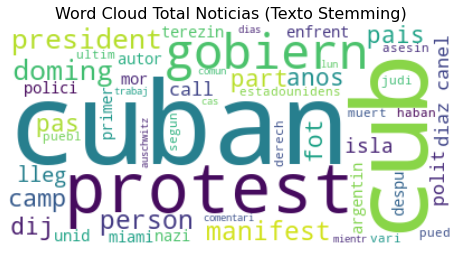

In [67]:
import matplotlib.pyplot as plt
!pip install matplotlib==3.1.3
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

lista_texto=[]
for num_lista in range(len(textos_stemming)):
  texto_=" ".join(textos_stemming[num_lista])
  lista_texto.append(texto_)
texto=" ".join(lista_texto)

datos=WordCloud(background_color="white",max_words=50).generate(texto)
plt.figure(figsize=(8,8))
plt.imshow(datos,interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Total Noticias (Texto Stemming)",fontsize=16)
plt.show()

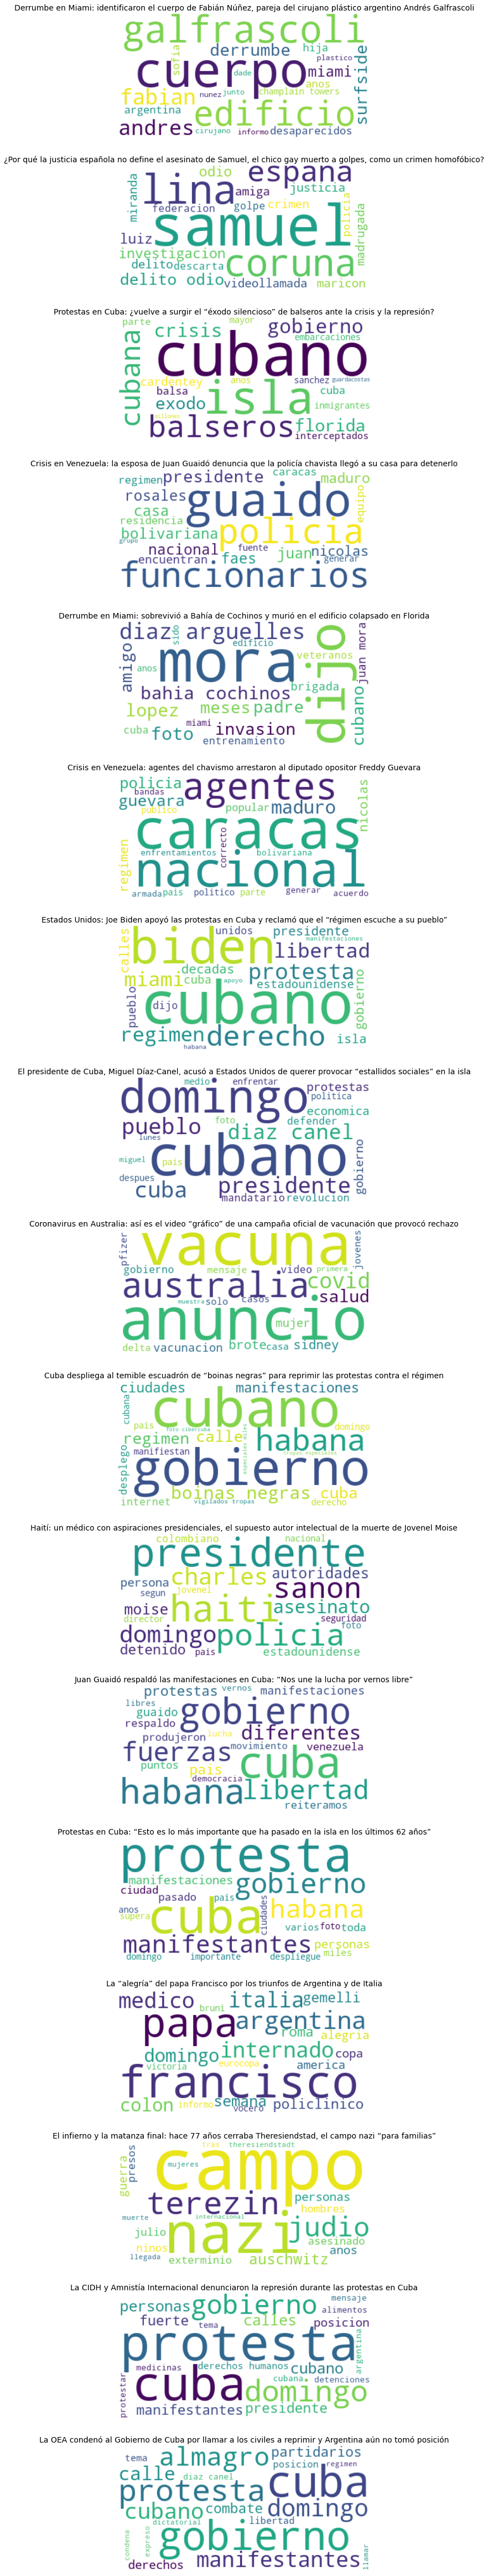

In [54]:
fig,ax=plt.subplots(len(textos_stemming),figsize=(20,85))
for i in range(len(textos_stemming)):
  texto=" ".join(textos_tokenizado[i])
  datos=WordCloud(background_color="white",max_words=20).generate(texto)
  ax[i].imshow(datos,interpolation="bilinear") 
  ax[i].set_title(datos_noticias["Titulo"][i],fontsize=14)

  ax[i].axis("off")
  

## **Modelamiento** 

Con el uso de los textos respectivamente Tokenizados se plenatea un modelo LDA que permita clasificar en Temas las noticias 

In [60]:
import gensim
from gensim.models import CoherenceModel

In [61]:
corpus=gensim.corpora.Dictionary(textos_stemming)
bow_corpus=[corpus.doc2bow(texto) for texto in textos_stemming]

In [62]:
coherencia={}

for i in range(1,len(textos_stemming)):
  lda_model=gensim.models.LdaMulticore(bow_corpus,num_topics=i,id2word=corpus)
  coherence_model_lda=CoherenceModel(model=lda_model,texts=textos_stemming,dictionary=corpus,coherence="c_v")

  coherencia[i]=coherence_model_lda.get_coherence()


In [63]:
coherencia

{1: 0.35525803603800454,
 2: 0.3846023222642597,
 3: 0.3690234382125206,
 4: 0.40562393155012844,
 5: 0.3881711906093272,
 6: 0.39291990983321196,
 7: 0.36136615658817994,
 8: 0.37867414509959435,
 9: 0.39245763168404696,
 10: 0.38299759881755085,
 11: 0.37795624262935923,
 12: 0.37170963179965777,
 13: 0.39273039977628377,
 14: 0.38433662883194125,
 15: 0.3611175231759152,
 16: 0.3736282882176454}

* El numero mas alto de coherencia con respecto a la cantidad de temas es de 4

In [64]:
lda_model=gensim.models.LdaMulticore(bow_corpus,num_topics=4,id2word=corpus)

In [65]:
for idx, topic in lda_model.print_topics():
  print(f"Topic: {idx}\nWords: {topic}")

Topic: 0
Words: 0.007*"camp" + 0.006*"cuban" + 0.005*"person" + 0.005*"gobiern" + 0.004*"fot" + 0.004*"pais" + 0.004*"president" + 0.004*"manifest" + 0.004*"cub" + 0.004*"anos"
Topic: 1
Words: 0.008*"cub" + 0.007*"cuban" + 0.007*"manifest" + 0.006*"gobiern" + 0.006*"protest" + 0.005*"fot" + 0.004*"doming" + 0.004*"dij" + 0.004*"samuel" + 0.004*"pais"
Topic: 2
Words: 0.017*"cuban" + 0.010*"protest" + 0.009*"cub" + 0.007*"gobiern" + 0.007*"president" + 0.007*"doming" + 0.005*"manifest" + 0.005*"diaz" + 0.005*"derech" + 0.005*"part"
Topic: 3
Words: 0.010*"cuban" + 0.006*"gobiern" + 0.006*"protest" + 0.005*"cub" + 0.005*"person" + 0.005*"president" + 0.005*"fot" + 0.004*"camp" + 0.004*"doming" + 0.004*"manifest"
